<a name="combine-features"></a>
## Combine features

In this exercise, you will practice how to combine features in a pandas dataframe.  This will help you in the graded assignment at the end of the week.  

In addition, you will explore why it makes more sense to multiply two features rather than add them in order to create interaction terms.

First, you will generate some data to work with.

In [2]:
import pandas as pd

from util import DataGenerator

X, y = DataGenerator(100).load_data()

In [5]:
feature_names = X.columns
print(feature_names)

X.head()

Index(['Age', 'Systolic_BP', 'Diastolic_BP', 'Cholesterol'], dtype='object')


,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,77.196340,78.379387,86.862625,83.344731
1,63.529850,85.439716,77.288707,107.483614
2,69.003986,98.406978,85.411057,118.495893
3,82.638210,100.362697,71.119650,87.737132
4,78.346286,121.854369,92.013270,99.121558


### Combine strings
Even though you can visually see feature names and type the name of the combined feature, you can programmatically create interaction features so that you can apply this to any dataframe.

Use f-strings to combine two strings.  There are other ways to do this, but Python's f-strings are quite useful.

In [6]:
X['{}_&_{}'.format(feature_names[0], feature_names[1])] = X['Age'] + X['Systolic_BP']
X.head(2)

,Age,Systolic_BP,Diastolic_BP,Cholesterol,Age_&_Systolic_BP
0,77.19634,78.379387,86.862625,83.344731,155.575726
1,63.52985,85.439716,77.288707,107.483614,148.969566


In [8]:
import seaborn as sns

In [9]:
# Generate a small dataset with two features
df = pd.DataFrame({'v1': [1,1,1,2,2,2,3,3,3],
                   'v2': [100,200,300,100,200,300,100,200,300]
                  })

# add the two features together
df['v1 + v2'] = df['v1'] + df['v2']

# multiply the two features together
df['v1 x v2'] = df['v1'] * df['v2']
df

,v1,v2,v1 + v2,v1 x v2
0,1,100,101,100
1,1,200,201,200
2,1,300,301,300
3,2,100,102,200
4,2,200,202,400
5,2,300,302,600
6,3,100,103,300
7,3,200,203,600
8,3,300,303,900


v1 + v2



v2,100,200,300
v1,,,
1,101,201,301
2,102,202,302
3,103,203,303


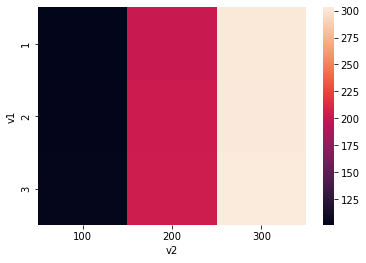

In [11]:
# Pivot the data so that v1 + v2 is the value

df_add = df.pivot(index='v1',
                  columns='v2',
                  values='v1 + v2'
                 )
print("v1 + v2\n")
display(df_add)
print()
sns.heatmap(df_add);

v1 x v2


v2,100,200,300
v1,,,
1,100,200,300
2,200,400,600
3,300,600,900


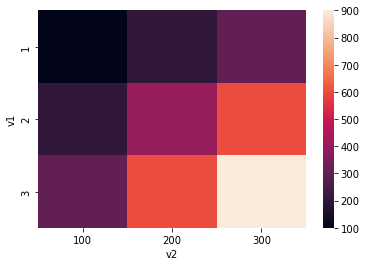

In [12]:
df_mult = df.pivot(index='v1',
                  columns='v2',
                  values='v1 x v2'
                 )
print('v1 x v2')
display(df_mult)
print()
sns.heatmap(df_mult);